# Data-Mining Project

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# %matplotlib notebook
%matplotlib inline
# %matplotlib widget
import missingno as msno
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
path = "/home/raffaele/Documents/DM-project/images"
#plt.style.use("seaborn-dark")

In [3]:
# !pwd
# import os
# os.chdir('/content/drive/My Drive/Data Mining/Project')
# !pwd

In [4]:
import os
os.chdir('/home/raffaele/Documents/dmproject/datasets/')

In [5]:
plots_dir = os.path.join(os.getcwd(), '../images')

## Loading the data set

Read the .csv file containing the data. The first line contains the list of attributes. The data is assigned to a Pandas dataframe.

In [6]:
df = pd.read_csv('customer_supermarket.csv', sep='\t', index_col=0, parse_dates=['BasketDate'])

In [7]:
print(df.head()) #print the first records of a df, 
print()
print(df.tail()) #print the last records of a df.

  BasketID          BasketDate  Sale  CustomerID CustomerCountry  ProdID  \
0   536365 2010-01-12 08:26:00  2,55     17850.0  United Kingdom  85123A   
1   536365 2010-01-12 08:26:00  3,39     17850.0  United Kingdom   71053   
2   536365 2010-01-12 08:26:00  2,75     17850.0  United Kingdom  84406B   
3   536365 2010-01-12 08:26:00  3,39     17850.0  United Kingdom  84029G   
4   536365 2010-01-12 08:26:00  3,39     17850.0  United Kingdom  84029E   

                             ProdDescr  Qta  
0   WHITE HANGING HEART T-LIGHT HOLDER    6  
1                  WHITE METAL LANTERN    6  
2       CREAM CUPID HEARTS COAT HANGER    8  
3  KNITTED UNION FLAG HOT WATER BOTTLE    6  
4       RED WOOLLY HOTTIE WHITE HEART.    6  

       BasketID          BasketDate  Sale  CustomerID CustomerCountry ProdID  \
541905   581587 2011-09-12 12:50:00   2,1     12680.0          France  22899   
541906   581587 2011-09-12 12:50:00  4,15     12680.0          France  23254   
541907   581587 2011-09-12

In [8]:
df.shape[0]

471910

## Types of Attributes and basic checks

Check the data integrity, that is whether there are any empty cells or corrupted data. 
We will use for this purpose the Pandas function **info()**, which checks if there is any 
null value in any column. This function also checks data type for each column, as well as 
number of each data types and number of observations (rows).

In [9]:
df.dtypes #return the type of each attribute

BasketID                   object
BasketDate         datetime64[ns]
Sale                       object
CustomerID                float64
CustomerCountry            object
ProdID                     object
ProdDescr                  object
Qta                         int64
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 471910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   BasketID         471910 non-null  object        
 1   BasketDate       471910 non-null  datetime64[ns]
 2   Sale             471910 non-null  object        
 3   CustomerID       406830 non-null  float64       
 4   CustomerCountry  471910 non-null  object        
 5   ProdID           471910 non-null  object        
 6   ProdDescr        471157 non-null  object        
 7   Qta              471910 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 32.4+ MB


## Basic Statistics

Above you can see that **"Sale" is not numeric** so we can convert it.

In [11]:
sale = df['Sale'].copy()

In [12]:
# Convert the comma with a point
sale = sale.apply(lambda x : str(x.replace(',','.')))
# Change the type of sale to float
sale = sale.astype(float)
df.drop(columns='Sale')
df['Sale'] = sale

In [13]:
df.describe()

,Sale,CustomerID,Qta
count,471910.000000,406830.000000,471910.000000
mean,4.030945,15287.684160,10.716533
std,83.769380,1713.603074,231.355136
min,-11062.060000,12346.000000,-80995.000000
25%,1.250000,13953.000000,1.000000
50%,2.080000,15152.000000,4.000000
75%,3.750000,16791.000000,12.000000
max,38970.000000,18287.000000,80995.000000


**Note:** The basic statistics show that **Qta** and **Sale have at least one negative value**.

Using the function **unique()** we can see unique value occuring for CustomerCountry.

In [14]:
print("Distinct Values in sex: \t", df.CustomerCountry.unique())

Distinct Values in sex: 	 ['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Bahrain' 'Greece' 'Hong Kong'
 'Singapore' 'Lebanon' 'United Arab Emirates' 'Saudi Arabia'
 'Czech Republic' 'Canada' 'Unspecified' 'Brazil' 'USA'
 'European Community' 'Malta' 'RSA']


There is an **Unspecified country**

In [15]:
# Define function to find missing values
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"+"There are " + str(mis_val_table_ren_columns.shape[0]) +" columns that have missing values.")        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [16]:
missing_values_table(df)

Your selected dataframe has 8 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
CustomerID,65080,13.8
ProdDescr,753,0.2


## Duplicate Rows Detection

In [17]:
duplicateRowsDF = df[df.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
duplicateRowsDF

Duplicate Rows except first occurrence based on all columns are :


,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
517,536409,2010-01-12 11:45:00,1.25,17908.0,United Kingdom,21866,UNION JACK FLAG LUGGAGE TAG,1
527,536409,2010-01-12 11:45:00,2.10,17908.0,United Kingdom,22866,HAND WARMER SCOTTY DOG DESIGN,1
537,536409,2010-01-12 11:45:00,2.95,17908.0,United Kingdom,22900,SET 2 TEA TOWELS I LOVE LONDON,1
539,536409,2010-01-12 11:45:00,4.95,17908.0,United Kingdom,22111,SCOTTIE DOG HOT WATER BOTTLE,1
555,536412,2010-01-12 11:49:00,2.95,17920.0,United Kingdom,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1
...,...,...,...,...,...,...,...,...
541675,581538,2011-09-12 11:34:00,0.39,14446.0,United Kingdom,22068,BLACK PIRATE TREASURE CHEST,1
541689,581538,2011-09-12 11:34:00,2.49,14446.0,United Kingdom,23318,BOX OF 6 MINI VINTAGE CRACKERS,1
541692,581538,2011-09-12 11:34:00,1.95,14446.0,United Kingdom,22992,REVOLVER WOODEN RULER,1
541699,581538,2011-09-12 11:34:00,2.10,14446.0,United Kingdom,22694,WICKER STAR,1


There are **5232 duplicated raws**.


In [18]:
df = df.drop_duplicates()

## Missing Values Detection

In [19]:
df.isnull().sum()

BasketID               0
BasketDate             0
Sale                   0
CustomerID         65073
CustomerCountry        0
ProdID                 0
ProdDescr            753
Qta                    0
dtype: int64

In [20]:
missing_values_table(df)

Your selected dataframe has 8 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
CustomerID,65073,13.9
ProdDescr,753,0.2


**"CustomerID"** and **"ProdDescr"** have respectively **65073 and 753 null values**.

Saved plot at /home/raffaele/Documents/dmproject/datasets/../images/missing_values_in_datasets 


<Figure size 432x288 with 0 Axes>

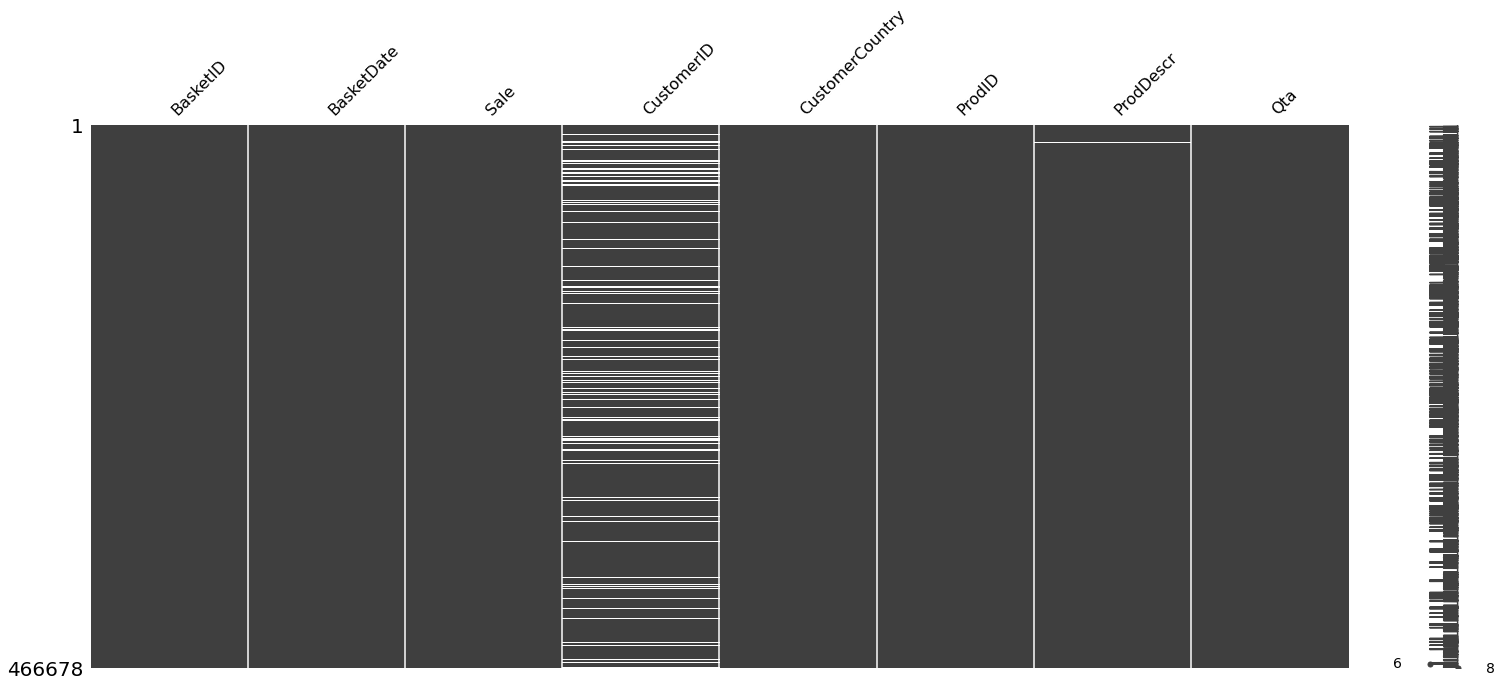

In [21]:
fig = plt.figure()
msno.matrix(df)
plot_path = os.path.join(plots_dir, 'missing_values_in_datasets')
plt.savefig(plot_path)
print('Saved plot at %s ' % plot_path)
plt.show()
plt.close() 

In [22]:
# Create a list of unique BasketID with null CustomerID records
Basket_list = df[df.CustomerID.isnull()]['BasketID'].tolist()

In [23]:
# Check for the number of records with these BasketID
len(df[df.BasketID.isin(Basket_list)])

65073

Here we found that the **number of the BasketID with null CustomerID is equivalent to the number of records with missing CustomerID**. Therefore we are unable to prevent the loss and have to remove all such records before any futher analysis or we can generate random variables, but it would change the distribution of the datas, so we decide to remove them.

In [24]:
# Remove all records with Null in CustomerID
rfm_df = df[df.CustomerID.notnull()].copy()

In [25]:
# Convert CustomerIDs to int type
rfm_df.CustomerID = (rfm_df.CustomerID).astype(object)

Saved plot at /home/raffaele/Documents/dmproject/datasets/../images/missing_values_in_datasets_after_CIDremoving 


<Figure size 432x288 with 0 Axes>

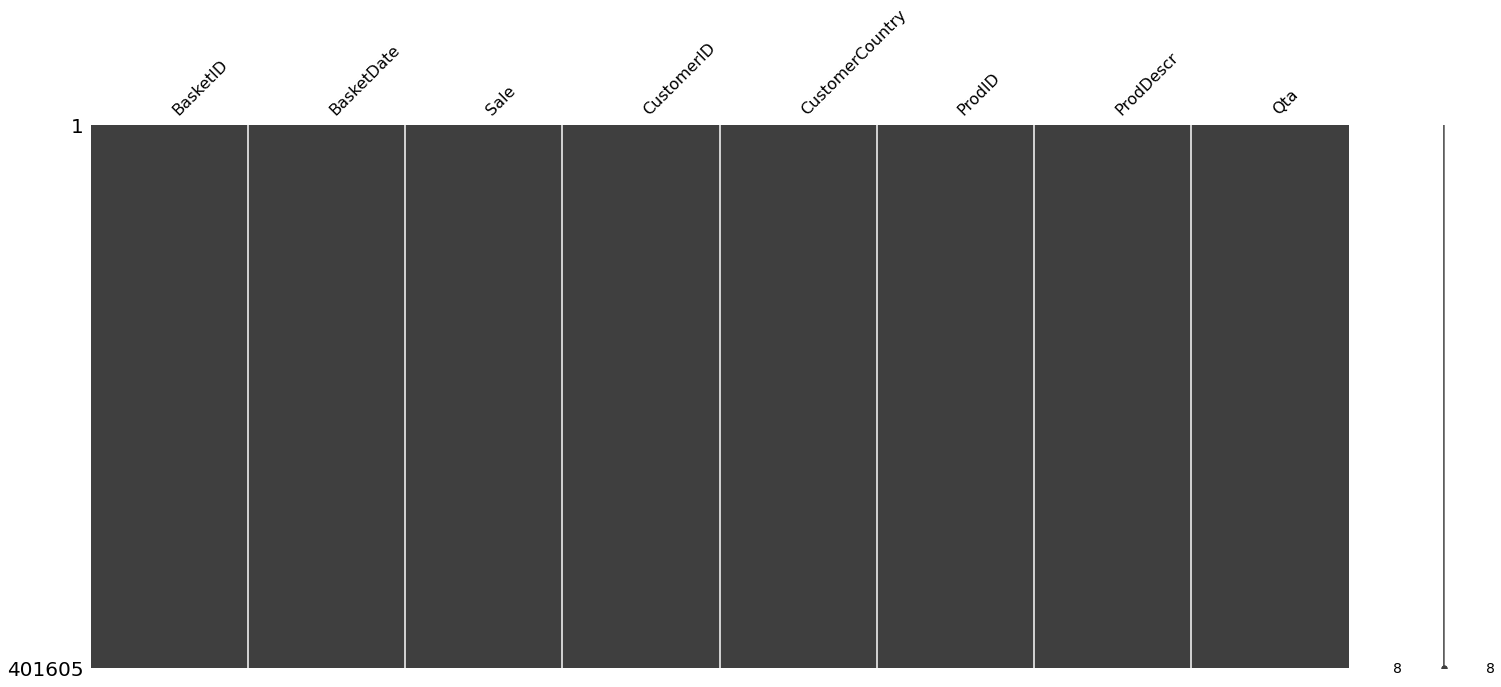

In [26]:
# Check the count of missing values afer removing Null CustomerID records
fig = plt.figure()
msno.matrix(rfm_df)

plot_path = os.path.join(plots_dir, 'missing_values_in_datasets_after_CIDremoving')
plt.savefig(plot_path)
print('Saved plot at %s ' % plot_path)
plt.show()
plt.close() 

**We no longer have missing values**

## Data Understanding

In [27]:
df.shape

(466678, 8)

In [28]:
rfm_df.shape

(401605, 8)

### Cancelled Items

In [29]:
# Check and remove transactions with cancelled items
desc_df = rfm_df[~rfm_df.BasketID.str.contains('C', na=False)]

In [30]:
# Let's create a feature with total cost of the transactions
desc_df['Total_cost'] = rfm_df.Qta * rfm_df.Sale

<ipython-input-30-0d47a6683c8b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  desc_df['Total_cost'] = rfm_df.Qta * rfm_df.Sale


In [31]:
desc_df

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta,Total_cost
0,536365,2010-01-12 08:26:00,2.55,17850,United Kingdom,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,15.30
1,536365,2010-01-12 08:26:00,3.39,17850,United Kingdom,71053,WHITE METAL LANTERN,6,20.34
2,536365,2010-01-12 08:26:00,2.75,17850,United Kingdom,84406B,CREAM CUPID HEARTS COAT HANGER,8,22.00
3,536365,2010-01-12 08:26:00,3.39,17850,United Kingdom,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,20.34
4,536365,2010-01-12 08:26:00,3.39,17850,United Kingdom,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,20.34
...,...,...,...,...,...,...,...,...,...
541905,581587,2011-09-12 12:50:00,2.10,12680,France,22899,CHILDREN'S APRON DOLLY GIRL,6,12.60
541906,581587,2011-09-12 12:50:00,4.15,12680,France,23254,CHILDRENS CUTLERY DOLLY GIRL,4,16.60
541907,581587,2011-09-12 12:50:00,4.15,12680,France,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,16.60
541908,581587,2011-09-12 12:50:00,4.95,12680,France,22138,BAKING SET 9 PIECE RETROSPOT,3,14.85


In [32]:
(desc_df["Sale"] == 0).sum()

40

In [33]:
df['BasketID'].astype(str).str.startswith('C').sum()

9051

In [34]:
desc_df['BasketID'].astype(str).str.startswith('C').sum()

0

In [35]:
(desc_df['Total_cost'] == 0).sum()

40

### EDA

In [36]:
# Check the oldest and latest date in the dataset.
print(f'Oldest date is - {desc_df.BasketDate.min()}\n')
print(f'Latest date is - {desc_df.BasketDate.max()}')

Oldest date is - 2010-01-12 08:26:00

Latest date is - 2011-12-10 17:19:00


In [37]:
# Check the top ten countries in the dataset with highest transactions
desc_df.CustomerCountry.value_counts(normalize=True).head(10).mul(100).round(1).astype(str) + '%'

United Kingdom    88.9%
Germany            2.3%
France             2.1%
EIRE               1.8%
Spain              0.6%
Netherlands        0.6%
Belgium            0.5%
Switzerland        0.5%
Portugal           0.4%
Australia          0.3%
Name: CustomerCountry, dtype: object

Saved plot at /home/raffaele/Documents/dmproject/datasets/../images/bar_plot_customer_transaction_different_years 


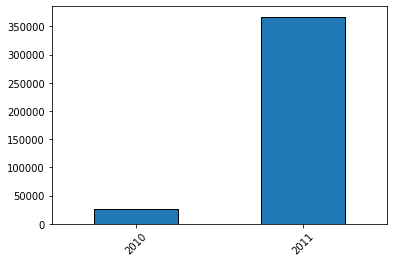

In [38]:
# Count of transactions in different years
desc_df.BasketDate.dt.year.value_counts(sort=False).plot(kind='bar', rot=45, edgecolor='black');

plot_path = os.path.join(plots_dir, 'bar_plot_customer_transaction_different_years')
plt.savefig(plot_path)
print('Saved plot at %s ' % plot_path)
plt.show()
plt.close() 

Since 2010 only includes transactions done in December, therefore it is evident that most of the records belong to 2011

In [39]:
C = rfm_df[rfm_df.BasketID.str.contains('C', na=False)]
C_size = C.BasketID.size
R_size = rfm_df.BasketID.size

Saved plot at /home/raffaele/Documents/dmproject/datasets/../images/bar_plot_cancelled&regular_order 


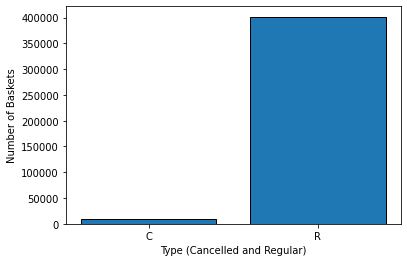

In [40]:
plt.bar(['C','R'], [C_size, R_size], edgecolor='black')
plt.xlabel('Type (Cancelled and Regular)')
plt.ylabel('Number of Baskets')

plot_path = os.path.join(plots_dir, 'bar_plot_cancelled&regular_order')
plt.savefig(plot_path)
print('Saved plot at %s ' % plot_path)
plt.show()
plt.close() 

Saved plot at /home/raffaele/Documents/dmproject/datasets/../images/bar_plot_transaction_per_month 


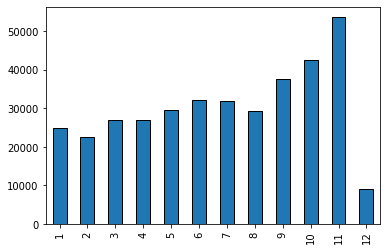

In [41]:
# Count of transactions in different months within 2011 year.
desc_df[desc_df.BasketDate.dt.year==2011].BasketDate.dt.month.value_counts(sort=False).plot(kind='bar', edgecolor='black');

plot_path = os.path.join(plots_dir, 'bar_plot_transaction_per_month')
plt.savefig(plot_path)
print('Saved plot at %s ' % plot_path)
plt.show()
plt.close() 

An increasing pattern can be observed month by month wise with a sharp decline in the month of December. That is evident because only first 8-9 days of December 2011 month is available in the dataset i.e. around 70% of the month transactions are not considered. Due to this fact, sales figure looks legitimate.

Saved plot at /home/raffaele/Documents/dmproject/datasets/../images/bar_plot_top_grossing_month 


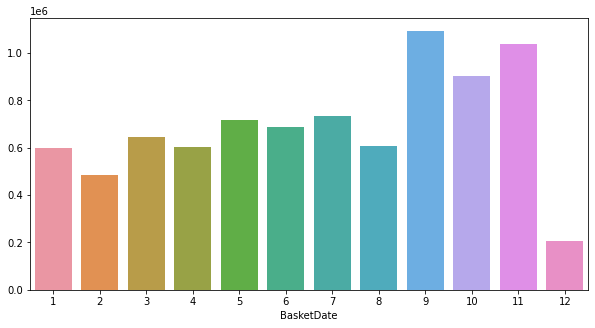

In [42]:
# Let's visualize the top grossing months
monthly_gross = desc_df[desc_df.BasketDate.dt.year==2011].groupby(desc_df.BasketDate.dt.month).Total_cost.sum()
plt.figure(figsize=(10,5))
sns.barplot(y=monthly_gross.values, x=monthly_gross.index);
# plt.xticks(range(1,13))

plot_path = os.path.join(plots_dir, 'bar_plot_top_grossing_month')
plt.savefig(plot_path)
print('Saved plot at %s ' % plot_path)
plt.show()
plt.close() 

Saved plot at /home/raffaele/Documents/dmproject/datasets/../images/bar_plot_top_grossing_week 


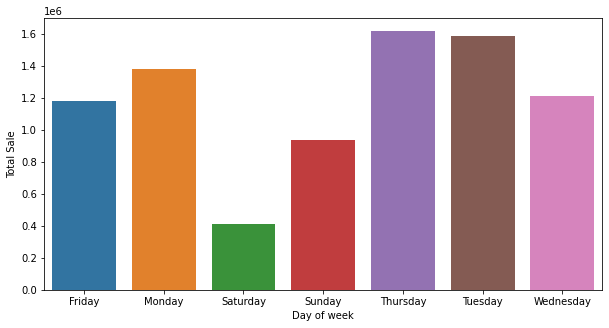

In [43]:
# Let's visualize the top grossing week
week_gross = desc_df[desc_df.BasketDate.dt.year==2011].groupby(desc_df.BasketDate.dt.day_name()).Total_cost.sum()
plt.figure(figsize=(10,5))
sns.barplot(y=week_gross.values,x=week_gross.index);
# plt.xticks(range(0,8))
plt.xlabel('Day of week')
plt.ylabel('Total Sale')

plot_path = os.path.join(plots_dir, 'bar_plot_top_grossing_week')
plt.savefig(plot_path)
print('Saved plot at %s ' % plot_path)
plt.show()
plt.close() 

Saved plot at /home/raffaele/Documents/dmproject/datasets/../images/bar_plot_top_grossing_hour 


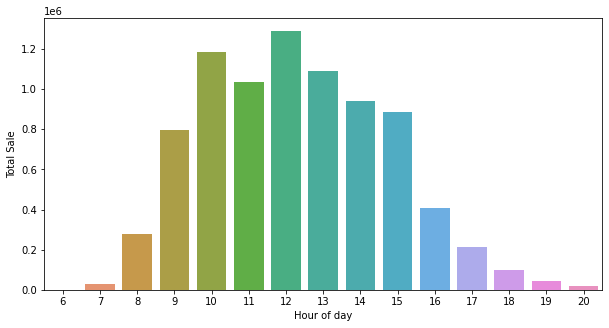

In [44]:
# Let's visualize the top grossing hour of day
hour_gross = desc_df[desc_df.BasketDate.dt.year==2011].groupby(desc_df.BasketDate.dt.hour).Total_cost.sum()
plt.figure(figsize=(10,5))
sns.barplot(y=hour_gross.values,x=hour_gross.index);
# plt.xticks(range(6,20))
plt.xlabel('Hour of day')
plt.ylabel('Total Sale')

plot_path = os.path.join(plots_dir, 'bar_plot_top_grossing_hour')
plt.savefig(plot_path)
print('Saved plot at %s ' % plot_path)
plt.show()
plt.close() 

A similar pattern is also observed in total gross each month as per the count of transactions in each month

Saved plot at /home/raffaele/Documents/dmproject/datasets/../images/box_plot_qta 


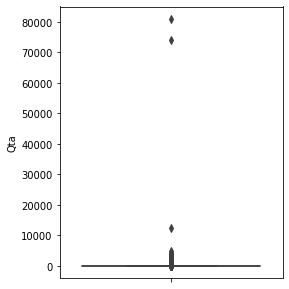

In [45]:
# Boxplot to visualize the Quantity distribution
plt.figure(figsize=(4,5))
sns.boxplot(y='Qta', data=desc_df);

plot_path = os.path.join(plots_dir, 'box_plot_qta')
plt.savefig(plot_path)
print('Saved plot at %s ' % plot_path)
plt.show()
plt.close() 

Saved plot at /home/raffaele/Documents/dmproject/datasets/../images/box_plot_price 


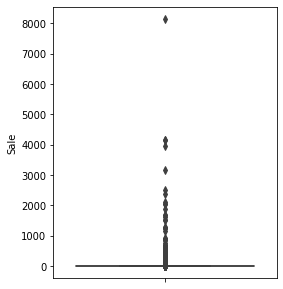

In [46]:
# Let's visualize the Unit price distribution
plt.figure(figsize=(4,5))
sns.boxplot(y='Sale', data=desc_df);

plot_path = os.path.join(plots_dir, 'box_plot_price')
plt.savefig(plot_path)
print('Saved plot at %s ' % plot_path)
plt.show()
plt.close() 

This shows that Quantity data is highly skewed towards lower quantity values with some outliers. May be data entry error or might be genuine order

Saved plot at /home/raffaele/Documents/dmproject/datasets/../images/bar_plot_top_selling_product 


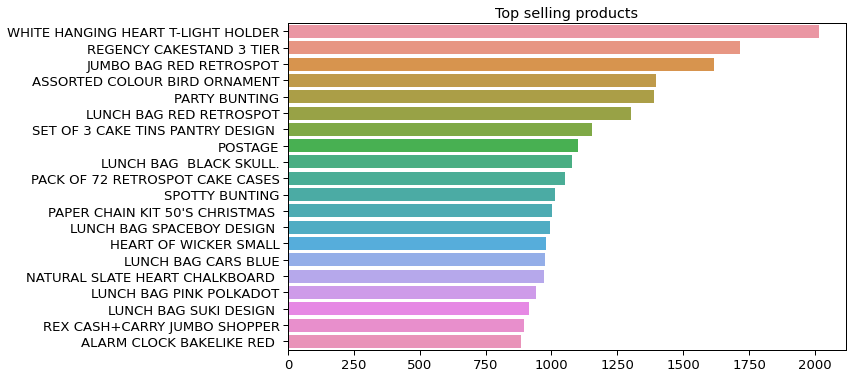

In [47]:
# Let's visualize some top products from the whole range.
top_products = desc_df['ProdDescr'].value_counts()[:20]
plt.figure(figsize=(10,6))
sns.set_context("paper", font_scale=1.5)
sns.barplot(y = top_products.index,
            x = top_products.values)
plt.title("Top selling products")

plot_path = os.path.join(plots_dir, 'bar_plot_top_selling_product')
plt.savefig(plot_path)
print('Saved plot at %s ' % plot_path)
plt.show()
plt.close() 

Similarly, Price of unit data shows heavy skewed distribution towards lower values of unit price.

### Basket Date

In [48]:
basket = rfm_df['BasketDate'].copy()
basket.describe()

<ipython-input-48-80448dc413c4>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  basket.describe()


count                  401605
unique                  20460
top       2011-11-14 15:27:00
freq                      543
first     2010-01-12 08:26:00
last      2011-12-10 17:19:00
Name: BasketDate, dtype: object

In [49]:
basket.value_counts()

2011-11-14 15:27:00    543
2011-11-28 15:54:00    534
2011-05-12 17:17:00    530
2011-11-23 13:39:00    444
2011-10-31 14:09:00    436
                      ... 
2011-06-17 13:40:00      1
2011-05-05 15:53:00      1
2011-10-26 10:33:00      1
2011-12-04 15:40:00      1
2011-04-19 11:08:00      1
Name: BasketDate, Length: 20460, dtype: int64

In [50]:
rfm_df.sort_values(by = ['BasketDate'], ascending=True)

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
0,536365,2010-01-12 08:26:00,2.55,17850,United Kingdom,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6
1,536365,2010-01-12 08:26:00,3.39,17850,United Kingdom,71053,WHITE METAL LANTERN,6
2,536365,2010-01-12 08:26:00,2.75,17850,United Kingdom,84406B,CREAM CUPID HEARTS COAT HANGER,8
3,536365,2010-01-12 08:26:00,3.39,17850,United Kingdom,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6
4,536365,2010-01-12 08:26:00,3.39,17850,United Kingdom,84029E,RED WOOLLY HOTTIE WHITE HEART.,6
...,...,...,...,...,...,...,...,...
394680,570876,2011-12-10 17:19:00,3.75,16085,United Kingdom,23394,POSTE FRANCE CUSHION COVER,1
394679,570876,2011-12-10 17:19:00,1.55,16085,United Kingdom,46000M,POLYESTER FILLER PAD 45x45cm,1
394678,570876,2011-12-10 17:19:00,1.45,16085,United Kingdom,46000S,POLYESTER FILLER PAD 40x40cm,1
394688,570876,2011-12-10 17:19:00,2.95,16085,United Kingdom,22470,HEART OF WICKER LARGE,3


Saved plot at /home/raffaele/Documents/dmproject/datasets/../images/bar_plot_basketDate 


<ipython-input-51-380b983368a2>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=90)


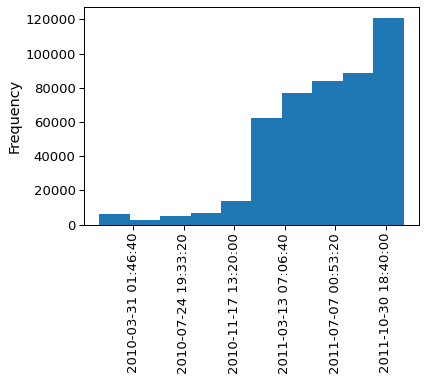

In [51]:
# converts datetime values to integers and changes labels on the plot. Some improvement could be done to move the tick labels to even locations.
# Also with approach a kernel density estimation plot (and any other plot) is also possible
bask_plot = pd.DataFrame({"BasketDate": pd.to_datetime(np.random.randint(1582800000000000000, 1583500000000000000, 100, dtype=np.int64))})
fig, ax = plt.subplots()
df["BasketDate"].astype(np.int64).plot.hist(ax=ax)
labels = ax.get_xticks().tolist()
labels = pd.to_datetime(labels)
ax.set_xticklabels(labels, rotation=90)

plot_path = os.path.join(plots_dir, 'bar_plot_basketDate')
plt.savefig(plot_path)
print('Saved plot at %s ' % plot_path)
plt.show()
plt.close() 

### Sale

In [52]:
sale.describe()

count    471910.000000
mean          4.030945
std          83.769380
min      -11062.060000
25%           1.250000
50%           2.080000
75%           3.750000
max       38970.000000
Name: Sale, dtype: float64

In [53]:
(sale < 0).sum()

2

In [54]:
df[sale < 0].head()

<ipython-input-54-a81895ca9288>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[sale < 0].head()


,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
299983,A563186,2011-12-08 14:51:00,-11062.06,NaN,United Kingdom,B,Adjust bad debt,1
299984,A563187,2011-12-08 14:52:00,-11062.06,NaN,United Kingdom,B,Adjust bad debt,1


In [55]:
df['BasketID'].astype(str).str.startswith('A').sum()

2

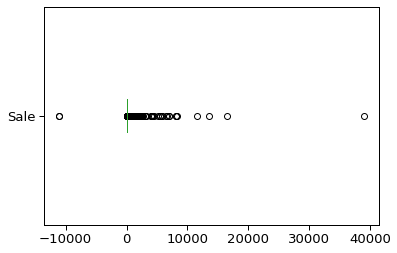

Saved plot at /home/raffaele/Documents/dmproject/datasets/../images/box_plot_sale_no_range 


<Figure size 432x288 with 0 Axes>

In [56]:
df['Sale'].plot(kind='box', vert=False)
plt.show()

plot_path = os.path.join(plots_dir, 'box_plot_sale_no_range')
plt.savefig(plot_path)
print('Saved plot at %s ' % plot_path)
plt.show()
plt.close() 

Saved plot at /home/raffaele/Documents/dmproject/datasets/../images/box_plot_sale_range 


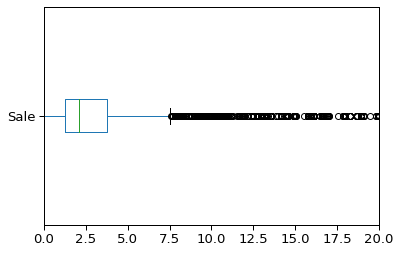

In [57]:
df['Sale'].plot(kind='box', vert=False, xlim=(0,20))

plot_path = os.path.join(plots_dir, 'box_plot_sale_range')
plt.savefig(plot_path)
print('Saved plot at %s ' % plot_path)
plt.show()
plt.close() 

Saved plot at /home/raffaele/Documents/dmproject/datasets/../images/bar_plot_sale_range 


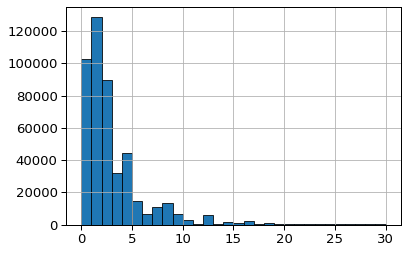

In [58]:
plt.figure()
df['Sale'].hist(bins=30, range=[0,30], edgecolor='black')

plot_path = os.path.join(plots_dir, 'bar_plot_sale_range')
plt.savefig(plot_path)
print('Saved plot at %s ' % plot_path)
plt.show()
plt.close() 

Saved plot at /home/raffaele/Documents/dmproject/datasets/../images/bar_plot_sale_no_range 


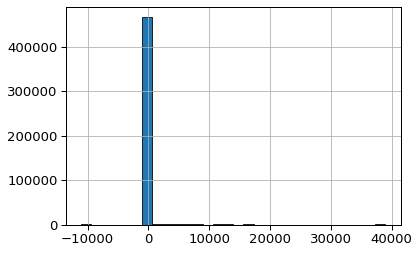

In [59]:
plt.figure()
df['Sale'].hist(bins=30, edgecolor='black')

plot_path = os.path.join(plots_dir, 'bar_plot_sale_no_range')
plt.savefig(plot_path)
print('Saved plot at %s ' % plot_path)
plt.show()
plt.close() 

So we understand that from what we have we can not find any particular meaning for BasketIDs starting with A, we also note that these correspond to a negative price and do not have the CustomerID.

In [60]:
# Negative values in Sale
rfm_df[rfm_df.Sale < 0]

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta


In [61]:
(sale == 0).sum()

1279

In [62]:
sale_valid = (sale > 0).sum()
sale_valid

470629

Before CustomerID dropping we had 1279 zero prices, two negatives and 470629 valid prices

In [63]:
(rfm_df["Sale"] == 0).sum()

40

In [64]:
# Explore zero values of 'Sale'
df_zero_price = rfm_df[rfm_df['Sale'] == 0]
df_zero_price

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
9302,537197,2010-05-12 14:02:00,0.0,12647,Germany,22841,ROUND CAKE TIN VINTAGE GREEN,1
33576,539263,2010-12-16 14:36:00,0.0,16560,United Kingdom,22580,ADVENT CALENDAR GINGHAM SACK,4
40089,539722,2010-12-21 13:45:00,0.0,14911,EIRE,22423,REGENCY CAKESTAND 3 TIER,10
47068,540372,2011-06-01 16:41:00,0.0,13081,United Kingdom,22090,PAPER BUNTING RETROSPOT,24
47070,540372,2011-06-01 16:41:00,0.0,13081,United Kingdom,22553,PLASTERS IN TIN SKULLS,24
56674,541109,2011-01-13 15:10:00,0.0,15107,United Kingdom,22168,ORGANISER WOOD ANTIQUE WHITE,1
86789,543599,2011-10-02 13:08:00,0.0,17560,United Kingdom,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16
130188,547417,2011-03-23 10:25:00,0.0,13239,United Kingdom,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36
139453,548318,2011-03-30 12:45:00,0.0,13113,United Kingdom,22055,MINI CAKE STAND HANGING STRAWBERY,5
145208,548871,2011-04-04 14:42:00,0.0,14410,United Kingdom,22162,HEART GARLAND RUSTIC PADDED,2


In [65]:
df[df['ProdID'] == '21653']

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
7193,537001,2010-03-12 15:33:00,0.0,NaN,United Kingdom,21653,NaN,-6


In [66]:
rfm_df['Sale'] = rfm_df.groupby(['ProdID'])['Sale'].transform(lambda x: 
                                                      x.replace(to_replace=0, method='ffill', value = x.max()))

In [67]:
(rfm_df["Sale"] == 0).sum()

0

In [68]:
rfm_df[rfm_df['ProdID'] == '22145']

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
19055,537827,2010-08-12 14:43:00,2.1,15332,Lithuania,22145,CHRISTMAS CRAFT HEART STOCKING,30


Saved plot at /home/raffaele/Documents/dmproject/datasets/../images/box_plot_NoID_sale_range 


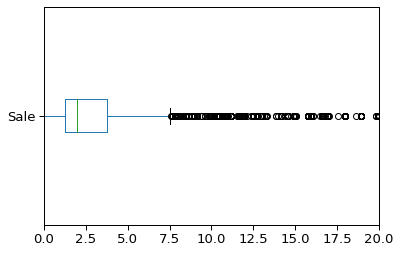

In [69]:
rfm_df['Sale'].plot(kind='box', vert=False, xlim=(0,20))

plot_path = os.path.join(plots_dir, 'box_plot_NoID_sale_range')
plt.savefig(plot_path)
print('Saved plot at %s ' % plot_path)
plt.show()
plt.close()

Saved plot at /home/raffaele/Documents/dmproject/datasets/../images/bar_plot_NoID_sale_range 


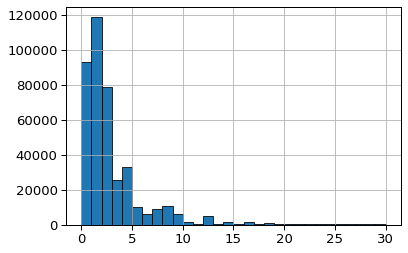

In [70]:
plt.figure()
rfm_df['Sale'].hist(bins=30, range=[0,30], edgecolor='black')

plot_path = os.path.join(plots_dir, 'bar_plot_NoID_sale_range')
plt.savefig(plot_path)
print('Saved plot at %s ' % plot_path)
plt.show()
plt.close()

### Customer ID

In [71]:
rfm_df[(rfm_df['CustomerID'] == 17850.0) & (rfm_df['ProdID'] == '82494L')]

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
60,536373,2010-01-12 09:02:00,2.55,17850,United Kingdom,82494L,WOODEN FRAME ANTIQUE WHITE,6
77,536375,2010-01-12 09:32:00,2.55,17850,United Kingdom,82494L,WOODEN FRAME ANTIQUE WHITE,6
292,536396,2010-01-12 10:51:00,2.55,17850,United Kingdom,82494L,WOODEN FRAME ANTIQUE WHITE,12
427,536406,2010-01-12 11:33:00,2.55,17850,United Kingdom,82494L,WOODEN FRAME ANTIQUE WHITE,6
3123,536600,2010-02-12 08:32:00,2.55,17850,United Kingdom,82494L,WOODEN FRAME ANTIQUE WHITE,6
3202,536609,2010-02-12 09:41:00,2.55,17850,United Kingdom,82494L,WOODEN FRAME ANTIQUE WHITE,6
3251,536612,2010-02-12 09:44:00,2.55,17850,United Kingdom,82494L,WOODEN FRAME ANTIQUE WHITE,6
3435,536628,2010-02-12 10:54:00,2.55,17850,United Kingdom,82494L,WOODEN FRAME ANTIQUE WHITE,6
3453,536630,2010-02-12 10:56:00,2.55,17850,United Kingdom,82494L,WOODEN FRAME ANTIQUE WHITE,6
3818,536685,2010-02-12 12:23:00,2.55,17850,United Kingdom,82494L,WOODEN FRAME ANTIQUE WHITE,6


Saved plot at /home/raffaele/Documents/dmproject/datasets/../images/bar_plot_CustomerID 


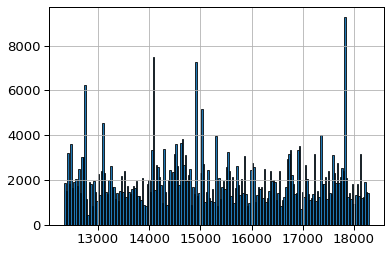

In [72]:
plt.figure()
df['CustomerID'].hist(bins=200, edgecolor='black')

plot_path = os.path.join(plots_dir, 'bar_plot_CustomerID')
plt.savefig(plot_path)
print('Saved plot at %s ' % plot_path)
plt.show()
plt.close()

Saved plot at /home/raffaele/Documents/dmproject/datasets/../images/bar_plot_NoID_CustomerID 


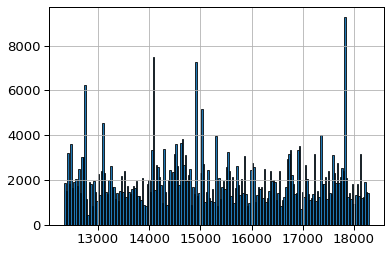

In [73]:
plt.figure()
rfm_df['CustomerID'].hist(bins=200, edgecolor='black')

plot_path = os.path.join(plots_dir, 'bar_plot_NoID_CustomerID')
plt.savefig(plot_path)
print('Saved plot at %s ' % plot_path)
plt.show()
plt.close()

Saved plot at /home/raffaele/Documents/dmproject/datasets/../images/box_plot_CustomerID 


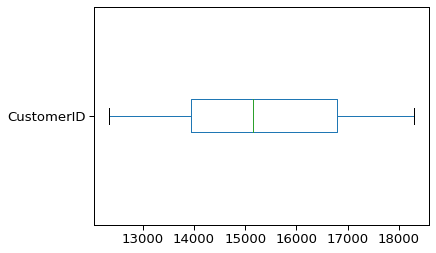

In [74]:
df['CustomerID'].plot(kind='box', vert=False)

plot_path = os.path.join(plots_dir, 'box_plot_CustomerID')
plt.savefig(plot_path)
print('Saved plot at %s ' % plot_path)
plt.show()
plt.close()

### Analisi fatta per eliminare i customers

In [75]:
c_id = df['CustomerID'].copy()
df[(df['CustomerID'].isnull()) & (df['Qta'] <= 0)]

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
4347,536764,2010-02-12 14:42:00,0.0,NaN,United Kingdom,84952C,NaN,-38
7188,536996,2010-03-12 15:30:00,0.0,NaN,United Kingdom,22712,NaN,-20
7192,537000,2010-03-12 15:32:00,0.0,NaN,United Kingdom,21414,NaN,-22
7193,537001,2010-03-12 15:33:00,0.0,NaN,United Kingdom,21653,NaN,-6
7195,537003,2010-03-12 15:33:00,0.0,NaN,United Kingdom,85126,NaN,-2
...,...,...,...,...,...,...,...,...
535321,581198,2011-07-12 18:26:00,0.0,NaN,United Kingdom,22025,check,-30
535322,581199,2011-07-12 18:26:00,0.0,NaN,United Kingdom,84581,NaN,-2
535324,581201,2011-07-12 18:30:00,0.0,NaN,United Kingdom,22217,damages?,-155
535328,581205,2011-07-12 18:32:00,0.0,NaN,United Kingdom,20893,damages,-55


In [76]:
c_id.isnull().sum()

65073

In [77]:
null_customer = df[df['CustomerID'].isnull()]

In [78]:
not_null = df[df['CustomerID'].notnull()]
unique_not_null = not_null['BasketID'].unique()
len(unique_not_null)

22190

In [79]:
unique_null_customer = null_customer['BasketID'].unique()
len(unique_null_customer)

2437

In [80]:
# Check if some NaN customerID have a BasketID so we can replace it
for i in unique_null_customer:
    for c in unique_not_null:
        if i == c:
            print("%s e' un customerID valido".format(c))

In [81]:
# df = df.dropna(subset=['CustomerID'])
# df.isnull().sum()

In [82]:
c_id.value_counts()

17841.0    7812
14911.0    5898
14096.0    5128
12748.0    4459
14606.0    2759
           ... 
13270.0       1
16765.0       1
14705.0       1
12943.0       1
16093.0       1
Name: CustomerID, Length: 4372, dtype: int64

In [83]:
# So how we can see all the BasketID that start with a 'C' have a negative value in 'Qta'
# Can it mean that they are some sort of 'return'

c_df = df.copy()
c_df = c_df[(c_df['BasketID'].str.contains('C')) & (c_df['Qta'] < 0)]
c_df

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
141,C536379,2010-01-12 09:41:00,27.50,14527.0,United Kingdom,D,Discount,-1
154,C536383,2010-01-12 09:49:00,4.65,15311.0,United Kingdom,35004C,SET OF 3 COLOURED FLYING DUCKS,-1
235,C536391,2010-01-12 10:24:00,1.65,17548.0,United Kingdom,22556,PLASTERS IN TIN CIRCUS PARADE,-12
236,C536391,2010-01-12 10:24:00,0.29,17548.0,United Kingdom,21984,PACK OF 12 PINK PAISLEY TISSUES,-24
237,C536391,2010-01-12 10:24:00,0.29,17548.0,United Kingdom,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24
...,...,...,...,...,...,...,...,...
540449,C581490,2011-09-12 09:57:00,0.83,14397.0,United Kingdom,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11
541541,C581499,2011-09-12 10:28:00,224.69,15498.0,United Kingdom,M,Manual,-1
541715,C581568,2011-09-12 11:57:00,10.95,15311.0,United Kingdom,21258,VICTORIAN SEWING BOX LARGE,-5
541716,C581569,2011-09-12 11:58:00,1.25,17315.0,United Kingdom,84978,HANGING HEART JAR T-LIGHT HOLDER,-1


In [84]:
c_df[c_df['ProdID'] == 'D']

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
141,C536379,2010-01-12 09:41:00,27.50,14527.0,United Kingdom,D,Discount,-1
9038,C537164,2010-05-12 13:21:00,29.29,14527.0,United Kingdom,D,Discount,-1
14498,C537597,2010-07-12 12:34:00,281.00,15498.0,United Kingdom,D,Discount,-1
19392,C537857,2010-08-12 16:00:00,267.12,17340.0,United Kingdom,D,Discount,-1
31134,C538897,2010-12-15 09:14:00,5.76,16422.0,United Kingdom,D,Discount,-1
...,...,...,...,...,...,...,...,...
479868,C577227,2011-11-18 12:06:00,19.82,14527.0,United Kingdom,D,Discount,-1
479869,C577227,2011-11-18 12:06:00,16.76,14527.0,United Kingdom,D,Discount,-1
493613,C578239,2011-11-23 12:29:00,26.33,14912.0,Italy,D,Discount,-1
516221,C579884,2011-11-30 17:34:00,20.53,14527.0,United Kingdom,D,Discount,-1


### Customer Country

In [85]:
df['CustomerCountry'].value_counts()

United Kingdom          421106
Germany                   9480
France                    8509
EIRE                      7814
Spain                     2528
Netherlands               2371
Belgium                   2069
Switzerland               1931
Portugal                  1486
Australia                 1258
Norway                    1086
Italy                      803
Channel Islands            757
Finland                    695
Cyprus                     611
Sweden                     461
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Unspecified                337
USA                        291
Israel                     266
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Hong Kong                  137
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

Saved plot at /home/raffaele/Documents/dmproject/datasets/../images/bar_plot_CustomerCountry 


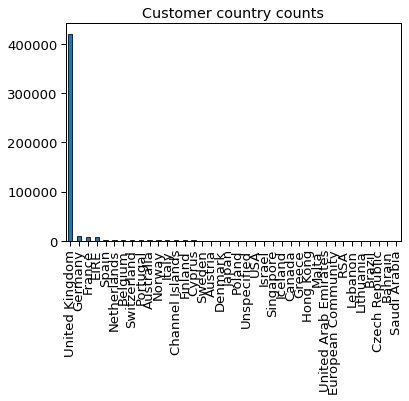

In [86]:
plt.figure()
df['CustomerCountry'].value_counts().plot(kind='bar',
                                          title='Customer country counts',
                                          edgecolor='black')

plot_path = os.path.join(plots_dir, 'bar_plot_CustomerCountry')
plt.savefig(plot_path)
print('Saved plot at %s ' % plot_path)
plt.show()
plt.close()

In [87]:
df_noUK = df.copy()
df_noUK = df_noUK[df_noUK['CustomerCountry'] != 'United Kingdom']

Saved plot at /home/raffaele/Documents/dmproject/datasets/../images/bar_plot_CustomerCountry_NoUK 


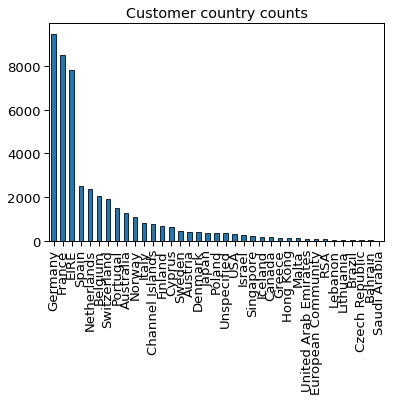

In [88]:
plt.figure()
df_noUK['CustomerCountry'].value_counts().plot(kind='bar',
                                          title='Customer country counts',
                                          edgecolor='black')

plot_path = os.path.join(plots_dir, 'bar_plot_CustomerCountry_NoUK')
plt.savefig(plot_path)
print('Saved plot at %s ' % plot_path)
plt.show()
plt.close()

### Prod ID

In [89]:
dsc = rfm_df['ProdID']

In [90]:
unique = dsc.unique()
unique

array(['85123A', '71053', '84406B', ..., '90214Z', '90089', '23843'],
      dtype=object)

### Prod Description

### Analisi fatta sulle prodDescription, ma dopo aver eliminato tutti i customerID nulli tutto questo risulta inutile

In [91]:
df['ProdDescr'].isnull().sum()

753

In [92]:
ds = df[df['ProdDescr'].isnull()]
ds

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
1986,536546,2010-01-12 14:33:00,0.0,NaN,United Kingdom,22145,NaN,1
2024,536550,2010-01-12 14:34:00,0.0,NaN,United Kingdom,85044,NaN,1
2025,536553,2010-01-12 14:35:00,0.0,NaN,United Kingdom,37461,NaN,3
4347,536764,2010-02-12 14:42:00,0.0,NaN,United Kingdom,84952C,NaN,-38
4348,536765,2010-02-12 14:43:00,0.0,NaN,United Kingdom,84952C,NaN,19
...,...,...,...,...,...,...,...,...
522162,580381,2011-02-12 17:58:00,0.0,NaN,United Kingdom,21758,NaN,-9
535322,581199,2011-07-12 18:26:00,0.0,NaN,United Kingdom,84581,NaN,-2
535326,581203,2011-07-12 18:31:00,0.0,NaN,United Kingdom,23406,NaN,15
535332,581209,2011-07-12 18:35:00,0.0,NaN,United Kingdom,21620,NaN,6


In [93]:
df[(df['ProdID'] == '22145')]

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
1986,536546,2010-01-12 14:33:00,0.0,NaN,United Kingdom,22145,NaN,1
19055,537827,2010-08-12 14:43:00,2.1,15332.0,Lithuania,22145,CHRISTMAS CRAFT HEART STOCKING,30
20392,538041,2010-09-12 13:09:00,0.0,NaN,United Kingdom,22145,NaN,30


In [94]:
# Replace the NaN prodDescr with the use of the prodID

df['ProdDescr'] = df.groupby(['ProdID'])['ProdDescr'].ffill()
df['ProdDescr'] = df.groupby(['ProdID'])['ProdDescr'].bfill()

In [95]:
# df.groupby(['ProdID'])['ProdDescr'].unique()

In [96]:
# plt.figure()
# df['ProdDescr'].value_counts().plot(kind='bar',
#                                           title='Customer country counts',
#                                           edgecolor='black')

### Qta

In [97]:
rfm_df['Qta'].isnull().sum()

0

In [98]:
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401605 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   BasketID         401605 non-null  object        
 1   BasketDate       401605 non-null  datetime64[ns]
 2   Sale             401605 non-null  float64       
 3   CustomerID       401605 non-null  object        
 4   CustomerCountry  401605 non-null  object        
 5   ProdID           401605 non-null  object        
 6   ProdDescr        401605 non-null  object        
 7   Qta              401605 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 37.6+ MB


In [99]:
qta = rfm_df['Qta'].copy()
qta.describe()

count    401605.000000
mean         12.183245
std         250.282726
min      -80995.000000
25%           2.000000
50%           5.000000
75%          12.000000
max       80995.000000
Name: Qta, dtype: float64

In [100]:
# Qui possiamo notare come é presente una certa simmetria tra le quantitá negative e quelle positive
rfm_df[rfm_df['Qta'].apply(abs) > 10000]

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
61619,541431,2011-01-18 10:01:00,1.04,12346,United Kingdom,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215
61624,C541433,2011-01-18 10:17:00,1.04,12346,United Kingdom,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215
502122,578841,2011-11-25 15:57:00,0.85,13256,United Kingdom,84826,ASSTD DESIGN 3D PAPER STICKERS,12540
540421,581483,2011-09-12 09:15:00,2.08,16446,United Kingdom,23843,"PAPER CRAFT , LITTLE BIRDIE",80995
540422,C581484,2011-09-12 09:27:00,2.08,16446,United Kingdom,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995


In [101]:
rfm_df[rfm_df['ProdID'] == '23843']

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
540421,581483,2011-09-12 09:15:00,2.08,16446,United Kingdom,23843,"PAPER CRAFT , LITTLE BIRDIE",80995
540422,C581484,2011-09-12 09:27:00,2.08,16446,United Kingdom,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995


Saved plot at /home/raffaele/Documents/dmproject/datasets/../images/box_plot_Qta 


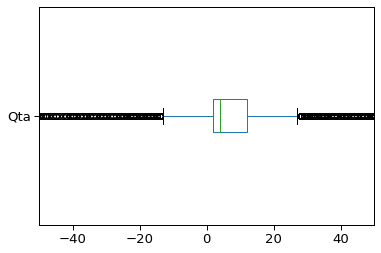

In [102]:
df['Qta'].plot(kind='box', vert=False,  xlim=(-50,50)) #figsize=(20,10)

plot_path = os.path.join(plots_dir, 'box_plot_Qta')
plt.savefig(plot_path)
print('Saved plot at %s ' % plot_path)
plt.show()
plt.close()

Saved plot at /home/raffaele/Documents/dmproject/datasets/../images/box_plot_NoID_Qta 


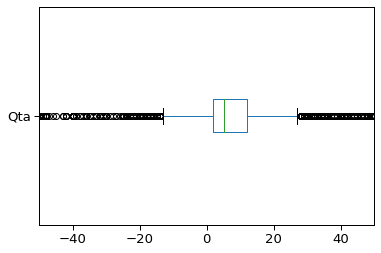

In [103]:
rfm_df['Qta'].plot(kind='box', vert=False,  xlim=(-50,50)) #figsize=(20,10)

plot_path = os.path.join(plots_dir, 'box_plot_NoID_Qta')
plt.savefig(plot_path)
print('Saved plot at %s ' % plot_path)
plt.show()
plt.close()

In [104]:
rfm_df[rfm_df['Qta'] < 0].size

70976

In [105]:
qta_neg = rfm_df[rfm_df['Qta'] < 0]
qta_neg['BasketID']

141       C536379
154       C536383
235       C536391
236       C536391
237       C536391
           ...   
540449    C581490
541541    C581499
541715    C581568
541716    C581569
541717    C581569
Name: BasketID, Length: 8872, dtype: object

In [106]:
neg_quant = rfm_df.copy()
neg_quant = rfm_df[rfm_df['Qta'] <= 0]
# neg_quant.head(50)
neg_quant.describe()

,Sale,Qta
count,8872.000000,8872.000000
mean,18.899512,-30.774910
std,445.190864,1172.249902
min,0.010000,-80995.000000
25%,1.450000,-6.000000
50%,2.950000,-2.000000
75%,4.950000,-1.000000
max,38970.000000,-1.000000


In [107]:
rfm_df[(rfm_df['ProdID'] == 'D') ].head()

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
141,C536379,2010-01-12 09:41:00,27.50,14527,United Kingdom,D,Discount,-1
9038,C537164,2010-05-12 13:21:00,29.29,14527,United Kingdom,D,Discount,-1
14498,C537597,2010-07-12 12:34:00,281.00,15498,United Kingdom,D,Discount,-1
19392,C537857,2010-08-12 16:00:00,267.12,17340,United Kingdom,D,Discount,-1
31134,C538897,2010-12-15 09:14:00,5.76,16422,United Kingdom,D,Discount,-1


In [108]:
rfm_df[rfm_df['BasketID'] == 'C536379']

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
141,C536379,2010-01-12 09:41:00,27.5,14527,United Kingdom,D,Discount,-1


In [109]:
rfm_df.loc[df['BasketID'].str.contains('C')]

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
141,C536379,2010-01-12 09:41:00,27.50,14527,United Kingdom,D,Discount,-1
154,C536383,2010-01-12 09:49:00,4.65,15311,United Kingdom,35004C,SET OF 3 COLOURED FLYING DUCKS,-1
235,C536391,2010-01-12 10:24:00,1.65,17548,United Kingdom,22556,PLASTERS IN TIN CIRCUS PARADE,-12
236,C536391,2010-01-12 10:24:00,0.29,17548,United Kingdom,21984,PACK OF 12 PINK PAISLEY TISSUES,-24
237,C536391,2010-01-12 10:24:00,0.29,17548,United Kingdom,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24
...,...,...,...,...,...,...,...,...
540449,C581490,2011-09-12 09:57:00,0.83,14397,United Kingdom,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11
541541,C581499,2011-09-12 10:28:00,224.69,15498,United Kingdom,M,Manual,-1
541715,C581568,2011-09-12 11:57:00,10.95,15311,United Kingdom,21258,VICTORIAN SEWING BOX LARGE,-5
541716,C581569,2011-09-12 11:58:00,1.25,17315,United Kingdom,84978,HANGING HEART JAR T-LIGHT HOLDER,-1


In [110]:
rfm_df[(rfm_df['CustomerID'] == 16029.0) & (rfm_df['Qta'] <= 0)]

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
43330,C540030,2011-04-01 13:47:00,3.75,16029,United Kingdom,22070,SMALL RED RETROSPOT MUG IN BOX,-24
121098,C546735,2011-03-16 11:50:00,2.10,16029,United Kingdom,22933,BAKING MOULD EASTER EGG MILK CHOC,-144
121099,C546735,2011-03-16 11:50:00,2.10,16029,United Kingdom,22932,BAKING MOULD TOFFEE CUP CHOCOLATE,-96
121100,C546735,2011-03-16 11:50:00,2.10,16029,United Kingdom,22930,BAKING MOULD HEART MILK CHOCOLATE,-96
173277,C551685,2011-03-05 12:51:00,8142.75,16029,United Kingdom,POST,POSTAGE,-1
173391,C551699,2011-03-05 14:12:00,6930.00,16029,United Kingdom,M,Manual,-1
196362,C553841,2011-05-19 12:19:00,0.20,16029,United Kingdom,D,Discount,-48
238153,C557927,2011-06-23 14:56:00,10.00,16029,United Kingdom,D,Discount,-1
279033,C561225,2011-07-26 10:06:00,45.60,16029,United Kingdom,D,Discount,-1
304661,C563592,2011-08-18 06:12:00,9.60,16029,United Kingdom,D,Discount,-1


## Outlier Detection and Correction

<AxesSubplot:>

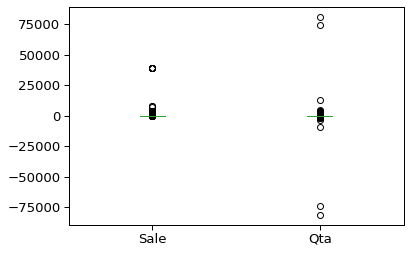

In [111]:
rfm_df[['Sale', 'Qta']].plot(kind='box')

In [112]:
def iqr_value(s): 
    q1 = s.quantile(q = 0.25)
    q3 = s.quantile(q = 0.75)
    iqr = q3 - q1
#     iqr_left = q1 - 1.5*iqr
#     iqr_right = q3 + 1.5*iqr
    return iqr,q1,q3

In [113]:
iqr,q1,q3 = iqr_value(rfm_df.Qta)
left_qta = q1 - (1.5*iqr)
right_qta = (q1 + (1.5*iqr))

<AxesSubplot:>

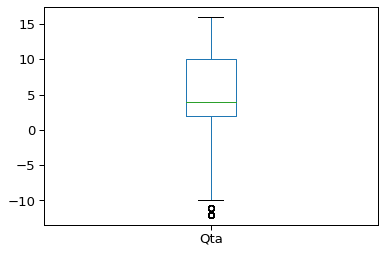

In [114]:
rfm_df[(rfm_df.Qta > left_qta) & (rfm_df.Qta < right_qta)].Qta.plot(kind='box')

In [115]:
iqr,q1,q3 = iqr_value(rfm_df.Sale)
left_sale = q1 - (1.5*iqr)
right_sale = (q1 + (1.5*iqr))

<AxesSubplot:>

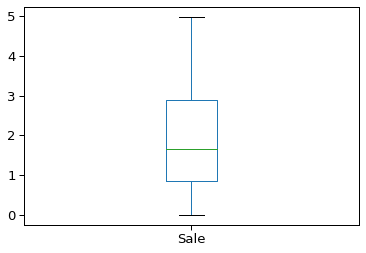

In [116]:
rfm_df[(rfm_df.Sale > left_sale) & (rfm_df.Sale < right_sale)].Sale.plot(kind='box')

In [117]:
# Remove all the outliers calculated before
outliers = rfm_df[(rfm_df.Sale < left_sale) | (rfm_df.Sale > right_sale) | (rfm_df.Qta < left_qta) | (rfm_df.Qta > right_qta)]
rfm_df.drop(outliers.index, inplace=True)

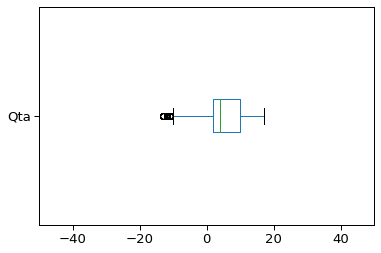

Saved plot at /home/raffaele/Documents/dmproject/datasets/../images/box_plot_Qta_final 


<Figure size 432x288 with 0 Axes>

In [118]:
rfm_df['Qta'].plot(kind='box', vert=False,  xlim=(-50,50)) #figsize=(20,10)
plt.show()

plot_path = os.path.join(plots_dir, 'box_plot_Qta_final')
plt.savefig(plot_path)
print('Saved plot at %s ' % plot_path)
plt.show()
plt.close()

## Build New Features

In [119]:
rfm_df

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
0,536365,2010-01-12 08:26:00,2.55,17850,United Kingdom,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6
1,536365,2010-01-12 08:26:00,3.39,17850,United Kingdom,71053,WHITE METAL LANTERN,6
2,536365,2010-01-12 08:26:00,2.75,17850,United Kingdom,84406B,CREAM CUPID HEARTS COAT HANGER,8
3,536365,2010-01-12 08:26:00,3.39,17850,United Kingdom,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6
4,536365,2010-01-12 08:26:00,3.39,17850,United Kingdom,84029E,RED WOOLLY HOTTIE WHITE HEART.,6
...,...,...,...,...,...,...,...,...
541904,581587,2011-09-12 12:50:00,0.85,12680,France,22613,PACK OF 20 SPACEBOY NAPKINS,12
541905,581587,2011-09-12 12:50:00,2.10,12680,France,22899,CHILDREN'S APRON DOLLY GIRL,6
541906,581587,2011-09-12 12:50:00,4.15,12680,France,23254,CHILDRENS CUTLERY DOLLY GIRL,4
541907,581587,2011-09-12 12:50:00,4.15,12680,France,23255,CHILDRENS CUTLERY CIRCUS PARADE,4


In [120]:
df_new = pd.DataFrame()

**TotalItems**: the total number of items purchased by a customer during all the obesrvation period. 

**DistinctItems**: the number of distinct items bought by a customer in all the observation period.

**maxItems**: the maximum number of items purchased by a customer during a
shopping session.


In [142]:
import math
import collections
# Shannon entropy on the purchasing behaviour of the customer
def estimate_shannon_entropy(values):
    m = len(values)
    IDs = collections.Counter([value for value in values])
    #print(IDs)
    entropy = 0
    for ID in IDs:
        n = IDs[ID]
        probability = n / float(m)
        entropy_i = probability * (math.log(probability, 2))
        entropy += entropy_i
        if entropy == 0:
            return 0
 
    return entropy * -1



**E**: the Shannon entropy on the purchasing behaviour of the customer

In [122]:
# number of total items purchased by a customer
df_new['TotalItems'] = rfm_df.groupby(['CustomerID'])['Qta'].agg('sum')
# number of distinct items
df_new['DistinctItems'] = rfm_df.groupby(['CustomerID'])['ProdID'].agg('nunique')
# max number of items purchased by a customer during the shop session
df_new['MaxItems'] = rfm_df.groupby(['CustomerID', 'BasketID']).Qta.agg('sum').max(level='CustomerID')

In [123]:
E = rfm_df.groupby(by=['CustomerID']).ProdID.apply(estimate_shannon_entropy)
df_new['Entropy'] = pd.DataFrame(E)

In [124]:
month = rfm_df['BasketDate'].dt.month
week = rfm_df['BasketDate'].dt.week

<ipython-input-124-bf50190ef4ad>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  week = rfm_df['BasketDate'].dt.week


In [125]:
def attributeMean(attribute, time, attribute2):
    temp = rfm_df.groupby([attribute, time])[attribute2].agg('sum').reset_index()
    mass = temp.groupby([attribute]).agg('max').reset_index()
    mass[attribute] = mass[attribute] *2
    count = temp.groupby([attribute]).agg('count').reset_index()
    # temp.groupby(['CustomerID'])['BasketID'].agg('mean')
    temp
    prova = mass - count
    for customer in prova.itertuples():
        for date in range(customer[2]):
#         print (date)
            new_row = {attribute:customer[1], 'BasketDate':13, attribute2:0.0}
            temp = temp.append(new_row, ignore_index=True)
        
    return temp

In [126]:
def distinctMean(attribute, time, attribute2):
    temp = rfm_df.groupby([attribute, time])[attribute2].agg('nunique').reset_index()
    mass = temp.groupby([attribute]).agg('max').reset_index()
    mass[attribute] = mass[attribute] *2
    count = temp.groupby([attribute]).agg('count').reset_index()
    # temp.groupby(['CustomerID'])['BasketID'].agg('mean')
    temp
    prova = mass - count
    for customer in prova.itertuples():
        for date in range(customer[2]):
#         print (date)
            new_row = {attribute:customer[1], 'BasketDate':13, attribute2:0.0}
            temp = temp.append(new_row, ignore_index=True)
        
    return temp

In [127]:
def freqMean(attribute, time, attribute2):
    temp = rfm_df.groupby([attribute, time])[attribute2].agg('count').reset_index()
    mass = temp.groupby([attribute]).agg('max').reset_index()
    mass[attribute] = mass[attribute] *2
    count = temp.groupby([attribute]).agg('count').reset_index()
    # temp.groupby(['CustomerID'])['BasketID'].agg('mean')
    temp
    prova = mass - count
    for customer in prova.itertuples():
        for date in range(customer[2]):
#         print (date)
            new_row = {attribute:customer[1], 'BasketDate':13, attribute2:0.0}
            temp = temp.append(new_row, ignore_index=True)
        
    return temp

In [128]:
last_date = df.BasketDate.max()

In [129]:
# Total Sale spent for each customer
df_new['TotalSale'] = rfm_df.groupby(['CustomerID'])['Sale'].agg('sum')

# Frequency of Customer purchase
df_new['Frequency'] = rfm_df.groupby(['CustomerID'])['BasketID'].agg('count')

# Country of the customer
df_new['CustomerCountry'] = rfm_df.groupby(['CustomerID'])['CustomerCountry'].unique().str[0]

# Total sale spent for month
temp = attributeMean('CustomerID', month, 'Sale')
df_new['MonthSale'] = temp.groupby(['CustomerID'])['Sale'].agg('mean')

# Total sale spent for week
temp = attributeMean('CustomerID', week, 'Sale')
df_new['WeekSale'] = temp.groupby(['CustomerID'])['Sale'].agg('mean')

# Frequency of Customer purchase for month
temp = freqMean('CustomerID', month, 'BasketID')
df_new['MonthFrequency'] = temp.groupby(['CustomerID'])['BasketID'].agg('mean')

# Frequency of Customer purchase for week
temp = freqMean('CustomerID', week, 'BasketID')
df_new['WeekFrequency'] = temp.groupby(['CustomerID'])['BasketID'].agg('mean')

# Recency Value
df_new['Recency'] = df.groupby("CustomerID").agg({"BasketDate": lambda values: (last_date - values.max()).days})

In [130]:
# MonthItems of Customer purchase for Month
temp = attributeMean('CustomerID', month, 'Qta')
df_new['MonthItems'] = temp.groupby(['CustomerID'])['Qta'].agg('mean')

# WeekItems of Customer purchase for Month
temp = attributeMean('CustomerID', week, 'Qta')
df_new['WeekItems'] = temp.groupby(['CustomerID'])['Qta'].agg('mean')

# number of distinct items per Month
temp = distinctMean('CustomerID', month, 'ProdID')
df_new['MonthDistinctItems'] = temp.groupby(['CustomerID'])['ProdID'].agg('mean')

# number of distinct items per Week
temp = distinctMean('CustomerID', week, 'ProdID')
df_new['WeekDistinctItems'] = temp.groupby(['CustomerID'])['ProdID'].agg('mean')

In [198]:
#Shannon Entropy on the month Customer purchase
Em = df.copy()
Em['BasketDate'] = Em.BasketDate.dt.month
Em = Em.groupby(by=['CustomerID']).BasketDate.apply(estimate_shannon_entropy)
df_new['EntropyMonth'] = pd.DataFrame(Em)

In [202]:
#Shannon Entropy on the week Customer purchase
Ew = df.copy()
Ew['BasketDate'] = Ew.BasketDate.dt.isocalendar().week
Ew = Ew.groupby(by=['CustomerID']).BasketDate.apply(estimate_shannon_entropy)
df_new['EntropyWeek'] = pd.DataFrame(Ew)

In [204]:
df_new.sample(20)

,TotalItems,DistinctItems,MaxItems,Entropy,TotalSale,Frequency,CustomerCountry,MonthSale,WeekSale,MonthFrequency,WeekFrequency,Recency,MonthItems,WeekItems,MonthDistinctItems,WeekDistinctItems,EntropyMonth,EntropyWeek
CustomerID,,,,,,,,,,,,,,,,,,
15484.0,784,94,381,6.462147,237.66,114,United Kingdom,21.605455,5.056596,10.363636,2.425532,10,71.272727,16.680851,10.363636,2.425532,1.595098,1.630377
16470.0,388,110,164,6.634422,266.83,154,United Kingdom,22.235833,5.336600,12.833333,3.080000,52,32.333333,7.760000,11.583333,2.780000,1.869830,1.869830
16904.0,1274,318,172,8.067351,1184.41,569,United Kingdom,118.441000,28.888049,56.900000,13.878049,60,127.400000,31.073171,52.800000,13.682927,2.946971,3.510254
15121.0,171,24,123,4.584963,67.35,24,United Kingdom,6.735000,1.603571,2.400000,0.571429,51,17.100000,4.071429,2.400000,0.571429,0.940286,0.940286
17436.0,72,7,42,2.750000,19.30,8,United Kingdom,2.412500,0.603125,1.000000,0.250000,120,9.000000,2.250000,1.000000,0.250000,0.991076,0.991076
12548.0,48,4,48,2.000000,5.60,4,Spain,0.933333,0.224000,0.666667,0.160000,167,8.000000,1.920000,0.666667,0.160000,0.000000,0.000000
12633.0,603,55,209,5.598627,191.92,81,Germany,15.993333,3.916735,6.750000,1.653061,0,50.250000,12.306122,6.333333,1.653061,1.559289,1.965129
15485.0,408,30,247,4.785152,70.08,39,United Kingdom,7.786667,1.946667,4.333333,1.083333,90,45.333333,11.333333,4.333333,1.083333,1.493209,1.493209
17384.0,48,10,42,3.277613,24.64,11,United Kingdom,2.240000,0.535652,1.000000,0.239130,20,4.363636,1.043478,1.000000,0.239130,0.721928,0.721928


/home/raffaele/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/raffaele/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/raffaele/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `h

Saved plot at /home/raffaele/Documents/dmproject/datasets/../images/dist_new_ds 


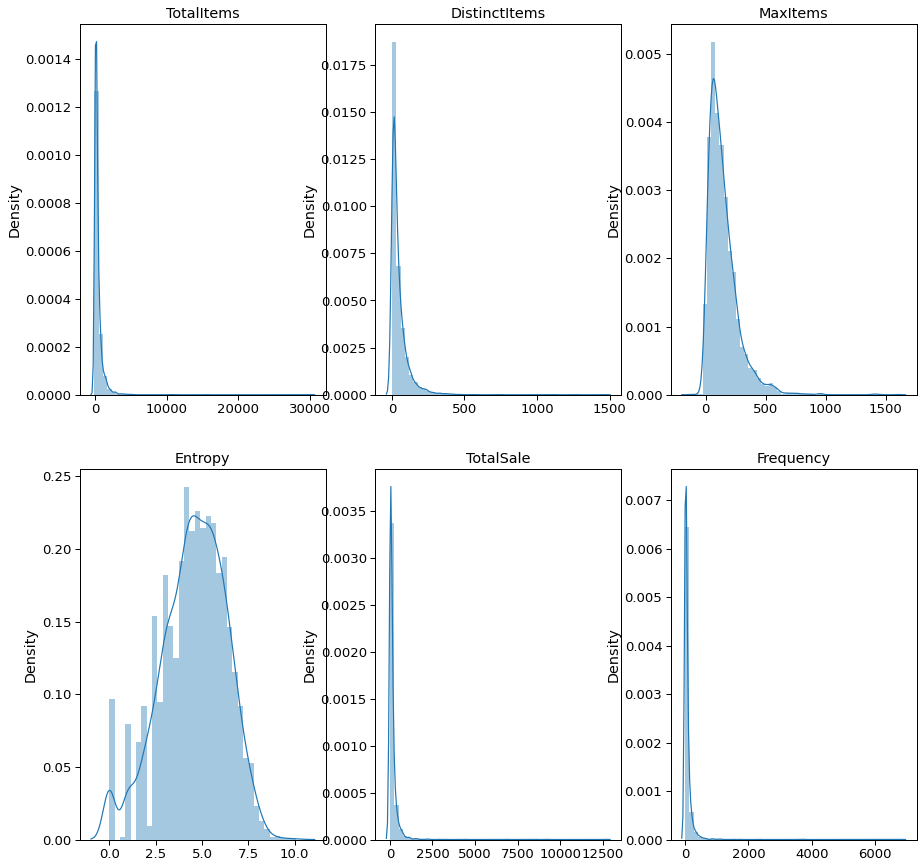

In [149]:
fig = plt.figure(figsize=(15, 15)) 
fig_dims = (2, 3)

plt.subplot2grid(fig_dims, (0, 0))
x = df_new[["TotalItems"]].dropna()
sns.distplot(x);
plt.title('TotalItems')

plt.subplot2grid(fig_dims, (0, 1))
x = df_new[["DistinctItems"]].dropna()
sns.distplot(x);
plt.title('DistinctItems')

plt.subplot2grid(fig_dims, (0, 2))
x = df_new[["MaxItems"]].dropna()
sns.distplot(x);
plt.title('MaxItems')

plt.subplot2grid(fig_dims, (1, 0))
x = df_new[["Entropy"]].dropna()
sns.distplot(x);
plt.title('Entropy')

plt.subplot2grid(fig_dims, (1, 1))
x = df_new[["TotalSale"]].dropna()
sns.distplot(x);
plt.title('TotalSale')

plt.subplot2grid(fig_dims, (1, 2))
x = df_new[["Frequency"]].dropna()
sns.distplot(x);
plt.title('Frequency')

plot_path = os.path.join(plots_dir, 'dist_new_ds')
plt.savefig(plot_path)
print('Saved plot at %s ' % plot_path)
plt.show()
plt.close()

In [150]:
correlation = df_new.corr()

Saved plot at /home/raffaele/Documents/dmproject/datasets/../images/corr_new_ds 


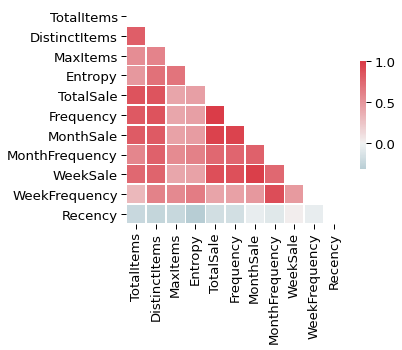

In [151]:
# Generate a mask for the upper triangle
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(correlation, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plot_path = os.path.join(plots_dir, 'corr_new_ds')
plt.savefig(plot_path)
print('Saved plot at %s ' % plot_path)
plt.show()
plt.close()

**OverAll**: the total number of items purchased by a customer during all the obesrvation period. 

**ObjectsWeek**: the number of distinct items bought by a customer in a week of observation.

**ObjectsMonth**: the number of distinct items bought by a customer in a month of observation.

**QtaMonth**: the total number of items purchased by a customer during a month of observation.


**QtaWeek**: the total number of items purchased by a customer during a week of observation.

In [152]:
# nonso = pd.DataFrame()
# nonso['OverAll'] = rfm_df['Qta'].groupby(rfm_df['CustomerID']).transform('sum')
# nonso['QtaMonth'] = rfm_df.groupby(['CustomerID', month])['Qta'].transform('sum')
# nonso['QtaWeek'] = rfm_df.groupby(['CustomerID', month])['Qta'].transform('sum')
# nonso['ObjectsWeek'] = rfm_df.groupby(['CustomerID', week])['ProdID'].transform('nunique')
# nonso['ObjectsMonth'] = rfm_df.groupby(['CustomerID', month])['ProdID'].transform('nunique')
# nonso['maxItems'] = rfm_df.groupby(['CustomerID', 'BasketID'])['Qta'].transform('max')

In [153]:
# corr = nonso.corr()

In [154]:
# Generate a mask for the upper triangle
# mask = np.zeros_like(corr, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True

# cmap = sns.diverging_palette(220, 10, as_cmap=True)

# sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
#             square=True, linewidths=.5, cbar_kws={"shrink": .5})

# plot_path = os.path.join(plots_dir, 'corr_nonDB')
# plt.savefig(plot_path)
# print('Saved plot at %s ' % plot_path)
# plt.show()
# plt.close()

#### Possiamo dire che siccome le cateogirie divise per "mesi" "settimane" e "overall" sono molto simili tra di loro abbiamo deciso di dropparle tutte e lasciare solamente gli "overall"

In [155]:
boh = pd.DataFrame()

In [156]:
boh['overAllActive'] = np.where(df_new['TotalItems']>=50, True, False)

In [157]:
boh['european'] = df_new.CustomerCountry.apply(lambda x: True if x in ['United Kingdom','Germany','France','EIRE', 'Spain','Netherlands',
                                                                          'Belgium','Switzerland','Portugal','Norway','Italy','Channel Islands',
                                                                          'Finland','Cyprus','Sweden', 'Austria', 'Denmark', 'Iceland', 
                                                                          'Greece', 'Malta','European Community','Lithuania','Czech Republic']
                                                   else False)

In [158]:
euro = boh[boh['european'] == 'True']
euro_size = euro.size

print(euro_size)
notEuro_size = boh['european'].size - euro_size

print(notEuro_size)

0
4152


Text(0, 0.5, 'Number of people')

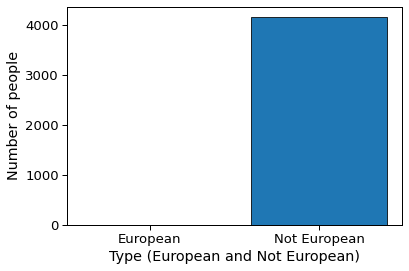

In [159]:
plt.bar(['European','Not European'], [euro_size, notEuro_size], edgecolor='black')
plt.xlabel('Type (European and Not European)')
plt.ylabel('Number of people')

In [160]:
correlation = df_new.corr()

<AxesSubplot:>

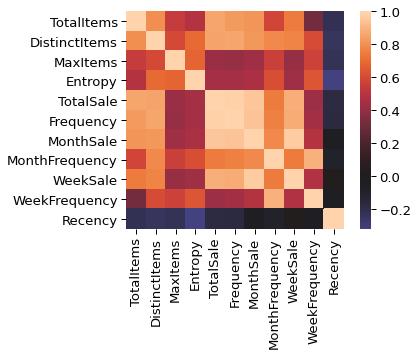

In [161]:
# Generate a mask for the upper triangle
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

cmap = sns.diverging_palette(220, 10, as_cmap=True)

# sns.heatmap(correlation, mask=mask, cmap=cmap, vmax=1, center=0,
#             square=True, linewidths=.5, cbar_kws={"shrink": .5})
sns.heatmap(correlation,vmax=1, center=0, square=True)

# Analisi dei nuovi dati

#### Normalizziamo prima i dati?? e poi vediamo le statistiche??

Saved plot at /home/raffaele/Documents/dmproject/datasets/../images/box_new_ds 


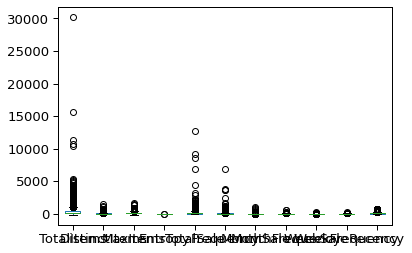

In [162]:
df_new.plot(kind='box')

plot_path = os.path.join(plots_dir, 'box_new_ds')
plt.savefig(plot_path)
print('Saved plot at %s ' % plot_path)
plt.show()
plt.close()

Saved plot at /home/raffaele/Documents/dmproject/datasets/../images/scatter_new_ds 


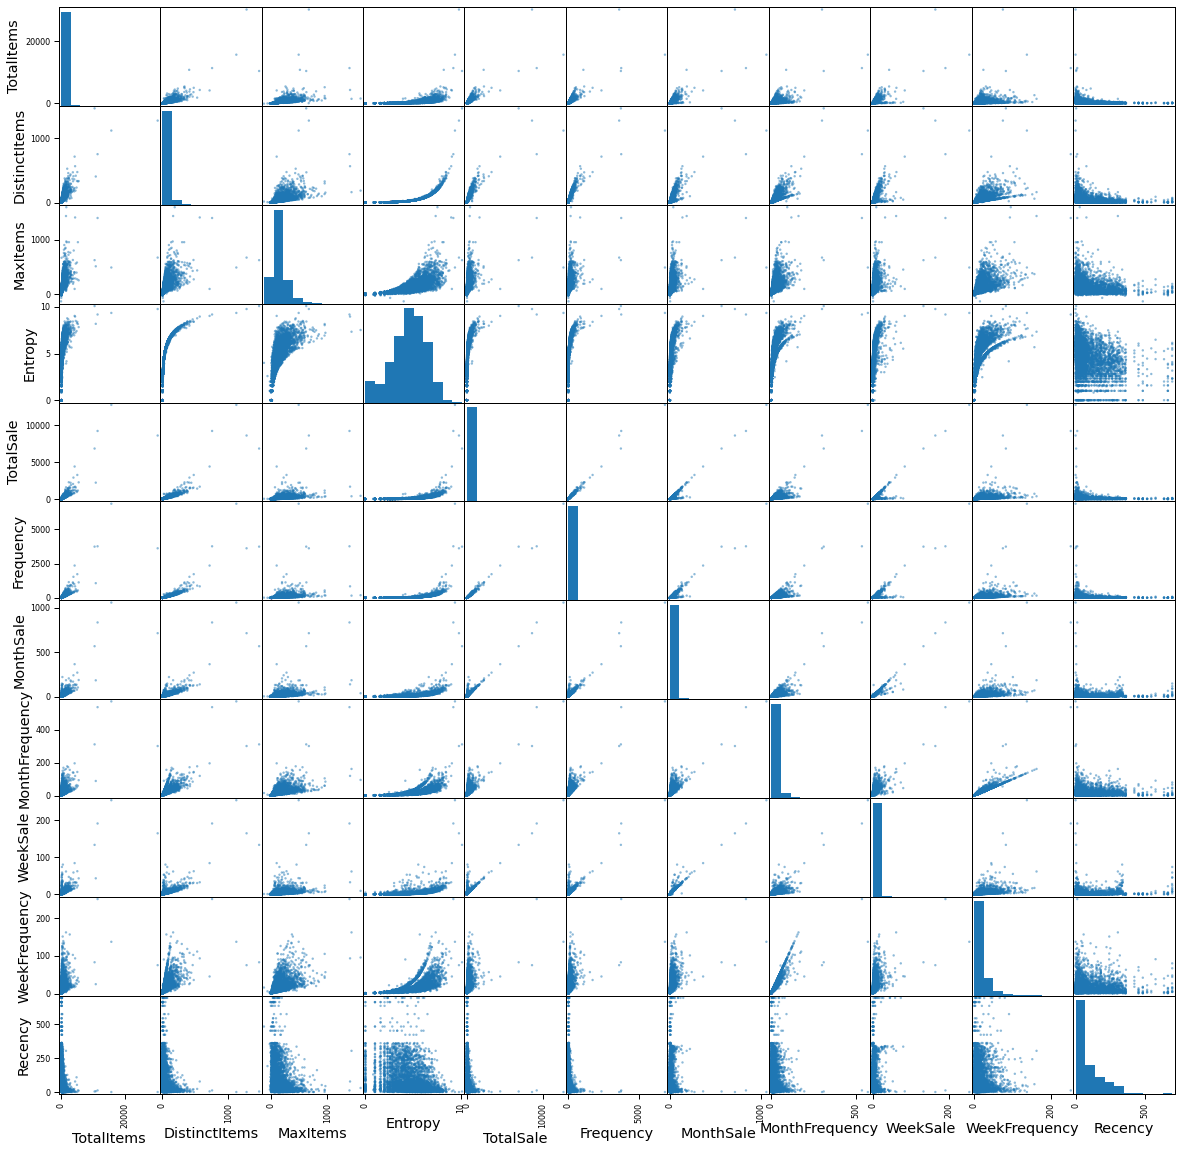

In [163]:
# plt.figure(figsize=(50,50))
pd.plotting.scatter_matrix(df_new, figsize=(20,20))

plot_path = os.path.join(plots_dir, 'scatter_new_ds')
plt.savefig(plot_path)
print('Saved plot at %s ' % plot_path)
plt.show()
plt.close()

## Normalized Histograms

In [338]:
# define function for the values below 0
def neg_to_zero(x):
    if x <= 0:
        return 1
    else:
        return x

In [354]:
df_new['TotalSale'] = [neg_to_zero(x) for x in df_new.TotalSale]
df_new['TotalItems'] = [neg_to_zero(x) for x in df_new.TotalItems]
df_new['DistinctItems'] = [neg_to_zero(x) for x in df_new.DistinctItems]
df_new['MaxItems'] = [neg_to_zero(x) for x in df_new.MaxItems]
df_new['Entropy'] = [neg_to_zero(x) for x in df_new.Entropy]
df_new['Frequency'] = [neg_to_zero(x) for x in df_new.Frequency]
df_new['MonthSale'] = [neg_to_zero(x) for x in df_new.MonthSale]
df_new['MonthFrequency'] = [neg_to_zero(x) for x in df_new.MonthFrequency]
df_new['WeekFrequency'] = [neg_to_zero(x) for x in df_new.WeekFrequency]
df_new['WeekSale'] = [neg_to_zero(x) for x in df_new.WeekSale]

In [356]:
# unskew the data
rfm_log = df_new[['TotalSale', 'TotalItems', 'DistinctItems', 'MaxItems', 'Entropy', 'Frequency','MonthSale','MonthFrequency','WeekFrequency','WeekSale']].apply(np.log, axis = 1).round(3)

In [357]:
from sklearn.preprocessing import StandardScaler

# scale the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(rfm_log)# transform into a dataframe
df_scaled = pd.DataFrame(df_scaled, index = df_new.index, columns = rfm_log.columns)

/home/raffaele/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/raffaele/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/raffaele/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `h

Saved plot at /home/raffaele/Documents/dmproject/datasets/../images/scaled_distribustions 


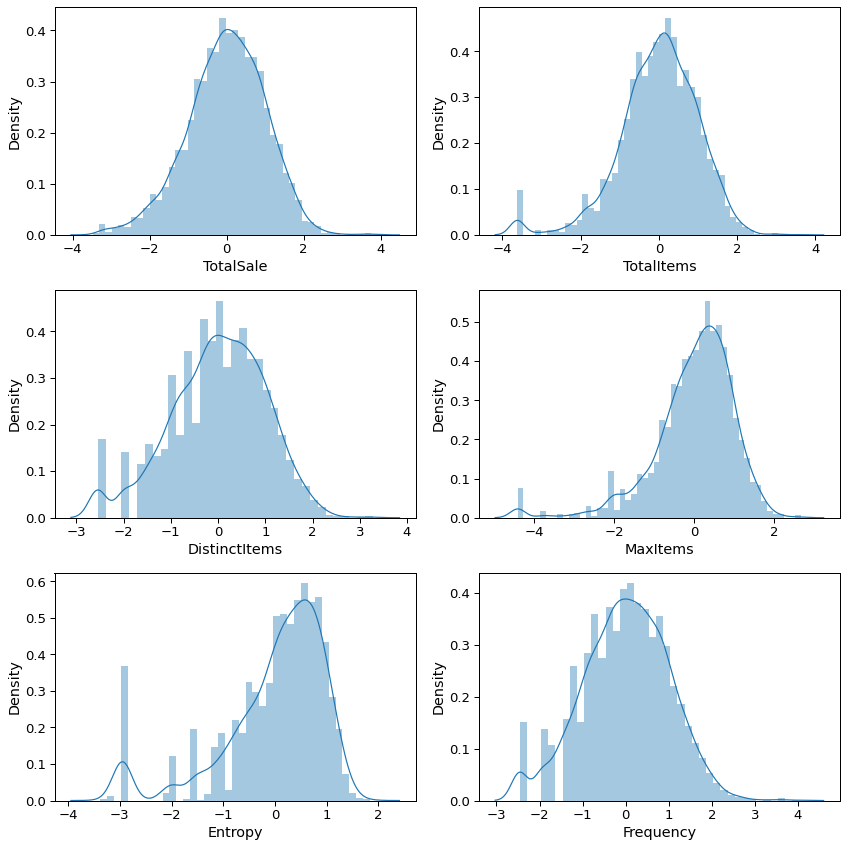

In [358]:
f,ax = plt.subplots(figsize=(12, 12))
plt.subplot(3, 2, 1); sns.distplot(df_scaled.TotalSale, label = 'TotalSale')
plt.subplot(3, 2, 2); sns.distplot(df_scaled.TotalItems, label = 'TotalItems')
plt.subplot(3, 2, 3); sns.distplot(df_scaled.DistinctItems, label = 'DistinctItems')
plt.subplot(3, 2, 4); sns.distplot(df_scaled.MaxItems, label = 'MaxItems')
plt.subplot(3, 2, 5); sns.distplot(df_scaled.Entropy, label = 'Entropy')
plt.subplot(3, 2, 6); sns.distplot(df_scaled.Frequency, label = 'Frequency')
plt.tight_layout()
plot_path = os.path.join(plots_dir, 'scaled_distribustions')
plt.savefig(plot_path)
print('Saved plot at %s ' % plot_path)
plt.show()


In [ ]:
df_new.to_csv('clustering_dataset.csv')